In [1]:
import numpy as np
from utils.plot_utils import *
import matplotlib.pyplot as plt

From [10.1007](https://link.springer.com/article/10.1007/s00362-012-0429-2) the ratio of two normally distributed variables X and Y, e.g. Z=X/Y, can be modelled by a normal distribution if the coefficient of variation of Y, i.e. $\sigma_Y/\mu_Y$, is smaller than 0.1.

In [2]:
def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    # Fast and numerically precise:
    variance = np.average((values-average)**2, weights=weights)
    return (average, np.sqrt(variance))

In [3]:
ratio = 8.5
std = 17000
sc = 30000
nsamples = int(1e7)
o = np.random.normal(sc*ratio,std,nsamples)
c = np.random.normal(sc, std, nsamples)

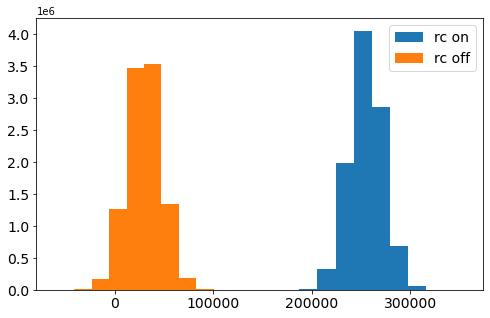

In [4]:
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(o, label = 'rc on')
ax.hist(c, label = 'rc off')
ax.legend(fontsize = 14)
set_fontsize(ax,14)

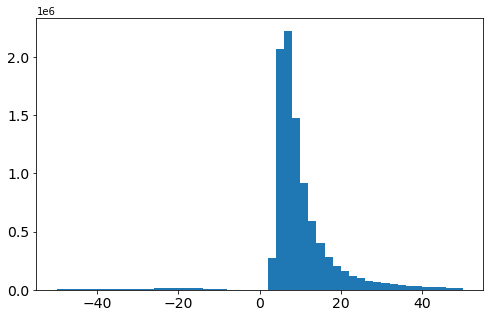

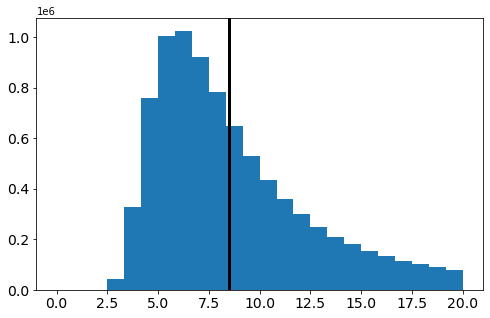

In [5]:
r = o/c
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(r, bins = np.linspace(-50,50,51))
set_fontsize(ax, 14)
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(r, bins = np.linspace(0,20,25))
set_fontsize(ax, 14)
ax.axvline(ratio, lw = 3, color = 'k')

In [6]:
print(f'mean : {r.mean():.3f}; median {np.median(r):.3f}')

mean : 8.981; median 8.051


### Now assuming I take 50 shots on one location, and a total of 4000 shots

In [7]:
ratio = 3.5
std = 17000
sc = 30000
nsamples = int(4000)
nbunched = 50
o = np.random.normal(sc*ratio,std,nsamples)
c = np.random.normal(sc, std, nsamples)

In [8]:
o = o.reshape(-1,nbunched)
c = c.reshape(-1,nbunched)

In [9]:
mo = o.mean(axis = 1)
mc = c.mean(axis = 1)
stdo = o.std(axis = 1)/np.sqrt(nbunched)
stdc = c.std(axis = 1)/np.sqrt(nbunched)

r = mo/mc
e = np.abs(r)*np.sqrt((stdo/mo)**2+(stdc/mc)**2)

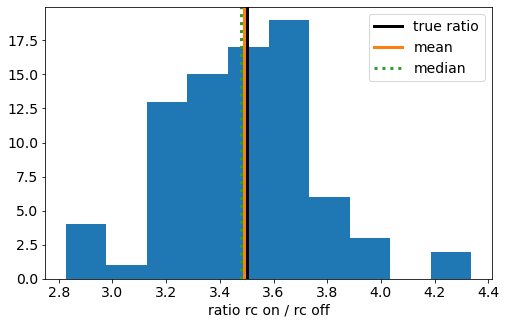

In [10]:
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(r)
ax.axvline(ratio, lw = 3, color = 'k', label = 'true ratio')
ax.axvline(r.mean(), lw = 3, color = 'C1', label = 'mean')
ax.axvline(np.median(r), lw = 3, color = 'C2', ls = 'dotted', label = 'median')
ax.legend(fontsize = 14)

ax.set_xlabel('ratio rc on / rc off')

set_fontsize(ax, 14)

In [11]:
print(f'mean : {r.mean():.3f}; median : {np.median(r):.3f}; std : {r.std():.3f}; std of mean : {r.std()/np.sqrt(len(r)):.3f}')

mean : 3.490; median : 3.479; std : 0.272; std of mean : 0.030


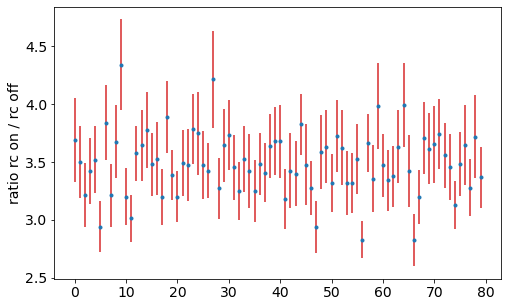

In [12]:
fig, ax = plt.subplots(figsize = (8,5))
ax.errorbar(np.arange(len(r)), r, e, fmt = '.', ecolor = 'C3')
ax.set_ylabel('ratio rc on / rc off')
set_fontsize(ax, 14)

In [13]:
rw, ew = weighted_avg_and_std(r, 1/e**2)
print(f'weigthed states -> mean : {rw:.3f}; std : {ew:.3f}; std of mean : {ew/np.sqrt(len(r)):.3f}')

weigthed states -> mean : 3.414; std : 0.279; std of mean : 0.031


### Bunch less shots together, e.g. 10

In [14]:
ratio = 3.5
std = 17000
sc = 30000
nsamples = int(4000)
nbunched = 10
o = np.random.normal(sc*ratio,std,nsamples)
c = np.random.normal(sc, std, nsamples)

In [15]:
o = o.reshape(-1,nbunched)
c = c.reshape(-1,nbunched)

In [16]:
mo = o.mean(axis = 1)
mc = c.mean(axis = 1)
stdo = o.std(axis = 1)/np.sqrt(nbunched)
stdc = c.std(axis = 1)/np.sqrt(nbunched)

r = mo/mc
e = np.abs(r)*np.sqrt((stdo/mo)**2+(stdc/mc)**2)

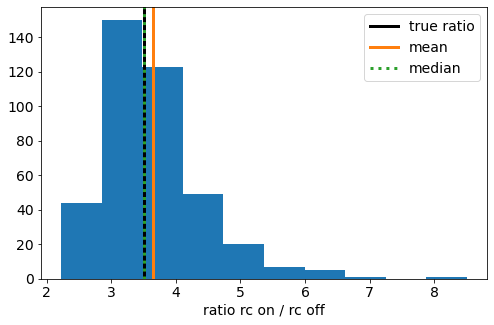

In [17]:
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(r)
ax.axvline(ratio, lw = 3, color = 'k', label = 'true ratio')
ax.axvline(r.mean(), lw = 3, color = 'C1', label = 'mean')
ax.axvline(np.median(r), lw = 3, color = 'C2', ls = 'dotted', label = 'median')
ax.legend(fontsize = 14)

ax.set_xlabel('ratio rc on / rc off')

set_fontsize(ax, 14)

In [18]:
print(f'mean : {r.mean():.3f}; median : {np.median(r):.3f}; std : {r.std():.3f}; std of mean : {r.std()/np.sqrt(len(r)):.3f}')

mean : 3.649; median : 3.500; std : 0.783; std of mean : 0.039


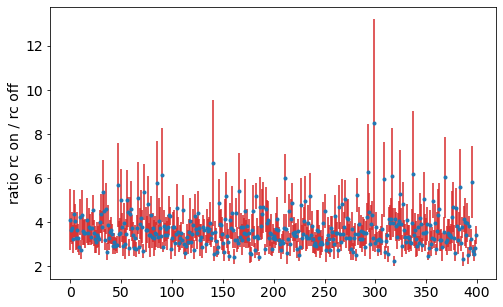

In [19]:
fig, ax = plt.subplots(figsize = (8,5))
ax.errorbar(np.arange(len(r)), r, e, fmt = '.', ecolor = 'C3')
ax.set_ylabel('ratio rc on / rc off')
set_fontsize(ax, 14)

In [20]:
rw, ew = weighted_avg_and_std(r, 1/e**2)
print(f'weigthed states -> mean : {rw:.3f}; std : {ew:.3f}; std of mean : {ew/np.sqrt(len(r)):.3f}')

weigthed states -> mean : 3.195; std : 0.544; std of mean : 0.027


### Bunch 50 shots, random amplitude for each bunch (each 50 are taken on a different spot)

In [21]:
ratio = 3.5
std = 17000
sc = 30000
nsamples = int(4000)
nbunched = 50
o = []
c = []
for _ in range(nsamples//nbunched):
    amp = np.random.normal(1,0.3)
    if amp < 0:
        amp = 0
    o.extend(np.random.normal(amp*sc*ratio,std,nbunched))
    c.extend(np.random.normal(amp*sc, std, nbunched))
o = np.asarray(o)
c = np.asarray(c)

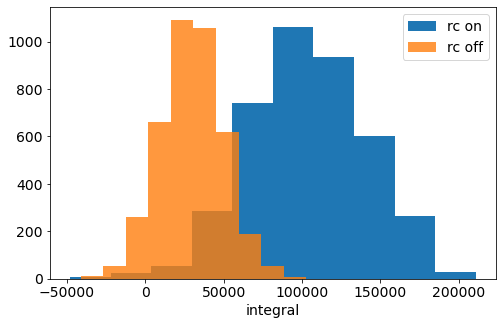

In [22]:
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(o, label = 'rc on')
ax.hist(c, alpha = 0.8, label = 'rc off')

ax.set_xlabel('integral')
ax.legend(fontsize = 14)
set_fontsize(ax, 14)

In [23]:
o = o.reshape(-1,nbunched)
c = c.reshape(-1,nbunched)

mo = o.mean(axis = 1)
mc = c.mean(axis = 1)
stdo = o.std(axis = 1)/np.sqrt(nbunched)
stdc = c.std(axis = 1)/np.sqrt(nbunched)

r = mo/mc
e = np.abs(r)*np.sqrt((stdo/mo)**2+(stdc/mc)**2)

In [24]:
from scipy.optimize import curve_fit

def gaussian(x, μ, σ):
    return 1/np.sqrt(2*np.pi*σ**2) * np.exp(-(x-μ)**2/(2*σ**2))

def normal(x, μ, σ):
    return np.exp(-(x-μ)**2/(2*σ**2))

fit_func = lambda x,μ,σ,a: a*normal(x,μ,σ)

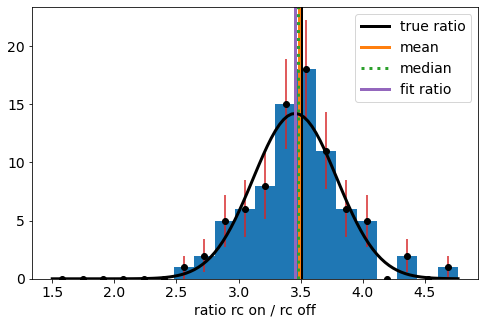

In [25]:
fig, ax = plt.subplots(figsize = (8,5))
y, bins, _ = ax.hist(r, np.linspace(1.5,min(r.max(), ratio*2),21))
ax.axvline(ratio, lw = 3, color = 'k', label = 'true ratio')
ax.axvline(r.mean(), lw = 3, color = 'C1', label = 'mean')
ax.axvline(np.median(r), lw = 3, color = 'C2', ls = 'dotted', label = 'median')

_x = np.linspace(bins.min(), bins.max(), 101)
x = bins[:-1]+np.diff(bins)[0]/2
p0 = (np.mean(r), np.std(r), np.max(y))
sigma = np.sqrt(y)
sigma[sigma == 0] = 1
popt, pcov = curve_fit(fit_func,x,y,sigma = sigma, p0 = p0, absolute_sigma = True)
ax.plot(_x, fit_func(_x, *popt), color = 'k', lw = 3)
ax.errorbar(x, y, yerr = np.sqrt(y), fmt = '.', ecolor = 'C3', color = 'k', ms = 12)

ax.axvline(popt[0], lw = 3, color = 'C4', label = 'fit ratio')

ax.legend(fontsize = 14)
ax.set_xlabel('ratio rc on / rc off')

set_fontsize(ax, 14)

In [26]:
print(f'mean : {r.mean():.3f}; median : {np.median(r):.3f}; std : {r.std():.3f}; std of mean : {r.std()/np.sqrt(len(r)):.3f}')
print(f'fit mean : {popt[0]:.3f}; fit std : {popt[1]:.3f}; fit std of mean : {popt[1]/np.sqrt(len(r)):.3f}')

mean : 3.485; median : 3.478; std : 0.374; std of mean : 0.042
fit mean : 3.454; fit std : 0.337; fit std of mean : 0.038


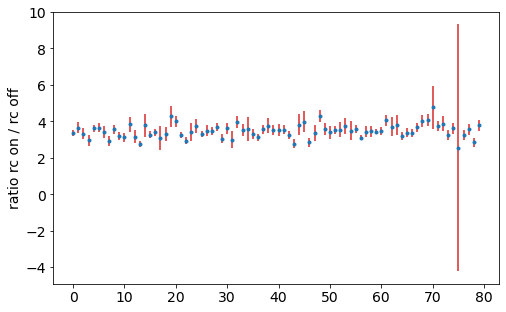

In [27]:
fig, ax = plt.subplots(figsize = (8,5))
ax.errorbar(np.arange(len(r)), r, e, fmt = '.', ecolor = 'C3')
ax.set_ylabel('ratio rc on / rc off')
set_fontsize(ax, 14)

In [28]:
rw, ew = weighted_avg_and_std(r, 1/e**2)
print(f'weigthed states -> mean : {rw:.3f}; std : {ew:.3f}; std of mean : {ew/np.sqrt(len(r)):.3f}')

weigthed states -> mean : 3.385; std : 0.312; std of mean : 0.035


rc on mean : 158159.986, fit : 157029.254
rc off mean : 46948.101, fit : 45495.452
rc on mean : 96866.538, fit : 96822.853
rc off mean : 26542.338, fit : 25649.458


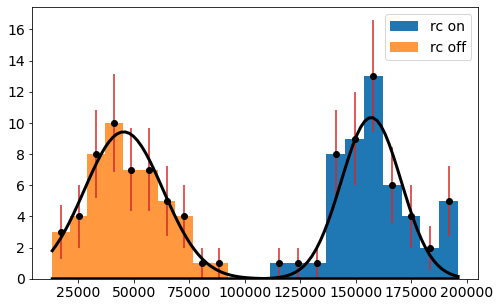

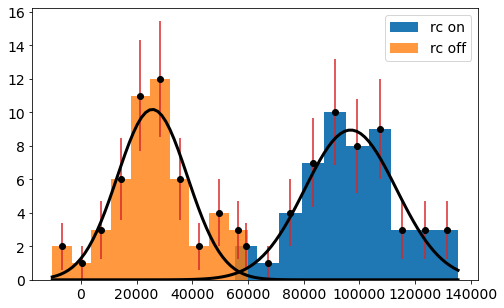

In [29]:
for ci, oi in zip(c,o[:2]):
    _x = np.linspace(min(ci.min(), oi.min()), max(oi.max(), ci.max()), 101)
    fig, ax = plt.subplots(figsize = (8,5))
    histo = ax.hist(oi, label = 'rc on')
    histc = ax.hist(ci, label = 'rc off', alpha = 0.8)
    ax.legend(fontsize = 14)
    set_fontsize(ax, 14)
    y = histo[0]
    x = histo[1][:-1]+np.diff(histo[1])[0]/2
    p0 = (np.mean(oi), np.std(oi), np.max(y))
    sigma = np.sqrt(y)
    sigma[sigma == 0] = 1
    popt, pcov = curve_fit(fit_func,x,y,sigma = sigma, p0 = p0, absolute_sigma = True)
    ax.plot(_x, fit_func(_x, *popt), color = 'k', lw = 3)
    ax.errorbar(x, y, yerr = np.sqrt(y), fmt = '.', ecolor = 'C3', color = 'k', ms = 12)
    
    print(f'rc on mean : {oi.mean():.3f}, fit : {popt[0]:.3f}')
    
    y = histc[0]
    x = histc[1][:-1]+np.diff(histc[1])[0]/2
    p0 = (np.mean(ci), np.std(ci), np.max(y))
    sigma[sigma == 0] = 1
    popt, pcov = curve_fit(fit_func,x,y,sigma = sigma, p0 = p0, absolute_sigma = True)
    ax.plot(_x, fit_func(_x, *popt), color = 'k', lw = 3)
    ax.errorbar(x, y, yerr = np.sqrt(y), fmt = '.', ecolor = 'C3', color = 'k', ms = 12)
    
    print(f'rc off mean : {ci.mean():.3f}, fit : {popt[0]:.3f}')

In [30]:
mo_fit = []
mc_fit = []
stdo_fit = []
stdc_fit = []

for ci, oi in zip(c,o):
    _x = np.linspace(min(ci.min(), oi.min()), max(oi.max(), ci.max()), 101)
    
    histo = np.histogram(oi)
    histc = np.histogram(ci)
    
    y = histo[0]
    x = histo[1][:-1]+np.diff(histo[1])[0]/2
    p0 = (np.mean(oi), np.std(oi), np.max(y))
    sigma = np.sqrt(y)
    sigma[sigma == 0] = 1
    popt, pcov = curve_fit(fit_func,x,y,sigma = sigma, p0 = p0, absolute_sigma = True)
    
    mo_fit.append(popt[0])
    stdo_fit.append(popt[1])
    
    y = histc[0]
    x = histc[1][:-1]+np.diff(histc[1])[0]/2
    p0 = (np.mean(ci), np.std(ci), np.max(y))
    sigma[sigma == 0] = 1
    popt, pcov = curve_fit(fit_func,x,y,sigma = sigma, p0 = p0, absolute_sigma = True)
    
    mc_fit.append(popt[0])
    stdc_fit.append(popt[1])
    
mo_fit = np.asarray(mo_fit)
stdo_fit = np.asarray(stdo_fit)
mc_fit = np.asarray(mc_fit)
stdc_fit = np.asarray(stdc_fit)

In [31]:
r_fit = mo_fit/mc_fit
e_fit = np.abs(r_fit)*np.sqrt((stdo_fit/mo_fit)**2+(stdc_fit/mc_fit)**2)

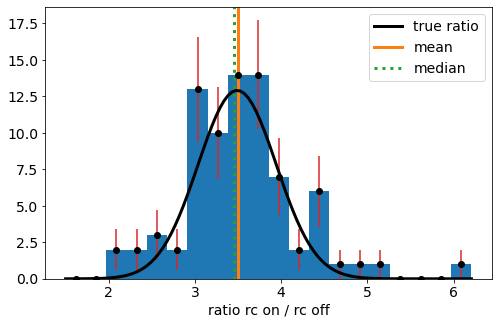

In [32]:
r_fitfig, ax = plt.subplots(figsize = (8,5))
y, bins, _ = ax.hist(r_fit, bins = np.linspace(1.5,min(r_fit.max(), ratio*2),21))
ax.axvline(ratio, lw = 3, color = 'k', label = 'true ratio')
ax.axvline(r_fit.mean(), lw = 3, color = 'C1', label = 'mean')
ax.axvline(np.median(r_fit), lw = 3, color = 'C2', ls = 'dotted', label = 'median')

_x = np.linspace(bins.min(), bins.max(), 101)
x = bins[:-1]+np.diff(bins)[0]/2
p0 = (np.mean(r_fit), np.std(r_fit), np.max(y))
sigma = np.sqrt(y)
sigma[sigma == 0] = 1
popt, pcov = curve_fit(fit_func,x,y,sigma = sigma, p0 = p0, absolute_sigma = True)
ax.plot(_x, fit_func(_x, *popt), color = 'k', lw = 3)
ax.errorbar(x, y, yerr = np.sqrt(y), fmt = '.', ecolor = 'C3', color = 'k', ms = 12)


ax.legend(fontsize = 14)

ax.set_xlabel('ratio rc on / rc off')

set_fontsize(ax, 14)

In [33]:
print(f'mean : {r_fit.mean():.3f}; median : {np.median(r_fit):.3f}; std : {r_fit.std():.3f}; std of mean : {r_fit.std()/np.sqrt(len(r_fit)):.3f}')
print(f'fit mean : {popt[0]:.3f}; fit std : {popt[1]:.3f}; fit std of mean : {popt[1]/np.sqrt(len(r)):.3f}')

mean : 3.504; median : 3.454; std : 0.716; std of mean : 0.080
fit mean : 3.489; fit std : 0.453; fit std of mean : 0.051


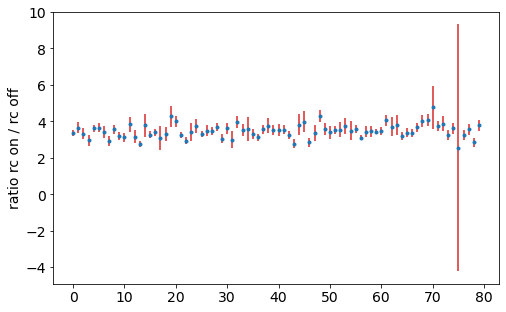

In [34]:
fig, ax = plt.subplots(figsize = (8,5))
ax.errorbar(np.arange(len(r_fit)), r, e, fmt = '.', ecolor = 'C3')
ax.set_ylabel('ratio rc on / rc off')
set_fontsize(ax, 14)

In [35]:
rw, ew = weighted_avg_and_std(r_fit, 1/e_fit**2)
print(f'weigthed states -> mean : {rw:.3f}; std : {ew:.3f}; std of mean : {ew/np.sqrt(len(r_fit)):.3f}')

weigthed states -> mean : 3.151; std : 0.554; std of mean : 0.062


### Bunch 50 shots, random amplitude for each bunch (each 50 are taken on a different spot)
Amplitude can never be below 0  
Scattered light noise + electronic noise $\sigma \simeq 2000$

Noise on RC signal $\simeq 33000$  
Noise on regular signal $\simeq 12000$

In [201]:
### generate data

ratio = 8.5

stdn = 2000
mc = 27652.726
mo = ratio * mc
stdo = 49077.998-stdn
stdc = 14580.005-stdn


sc = 30000
nsamples = int(4000)
nbunched = 50
o = []
c = []
for _ in range((nsamples//nbunched)//2):
    amp = np.random.normal(1,0.2)
    if amp < 0:
        amp = 0
    ci = amp*np.random.normal(mc, stdc, nbunched)
    ci[ci < 0] = 0
    oi = amp*np.random.normal(mo, stdo, nbunched)
    oi[oi < 0] = 0
    o.extend(oi + np.random.normal(0, stdn, nbunched))
    c.extend(ci + np.random.normal(0, stdn, nbunched))
o = np.asarray(o)
c = np.asarray(c)

In [202]:
### analysis cut procedure

clim = 20e3

ocut = []
ccut = []
for oi, ci in zip(o.reshape(-1,nbunched), c.reshape(-1,nbunched)):
    if ci.mean() > clim:
        ocut.extend(oi)
        ccut.extend(ci)
        
ocut = np.asarray(ocut)
ccut = np.asarray(ccut)

rc on -> μ : 241186.497, σ : 65237.218
rc off -> μ : 28293.236, σ : 13559.707
ratio of means : 8.524528510194575 +/- nan


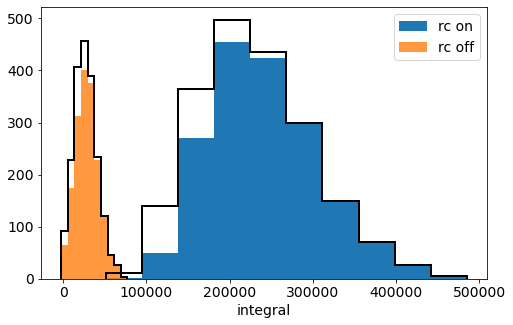

In [203]:
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(ocut, label = 'rc on')
ax.hist(ccut, alpha = 0.8, label = 'rc off')
ax.hist(o, histtype = 'step', color = 'k', lw = 2)
ax.hist(c, histtype = 'step', color = 'k', lw = 2)

ax.set_xlabel('integral')
ax.legend(fontsize = 14)
set_fontsize(ax, 14)

print(f'rc on -> μ : {ocut.mean():.3f}, σ : {ocut.std():.3f}')
print(f'rc off -> μ : {ccut.mean():.3f}, σ : {ccut.std():.3f}')
print(f'ratio of means : {ocut.mean()/ccut.mean()} +/- {np.nan:.3f}')

In [204]:
from scipy.integrate import quad

def ratio_pdf(z, μx, μy, σx, σy):
    a = lambda z: np.sqrt(1/σx**2 * z**2 + 1/σy**2)
    b = lambda z: μx/σx**2 * z + μy/σy**2
    c = (μx/σx)**2 + (μy/σy)**2
    d = lambda z: np.exp((b(z)**2-c*a(z)**2)/(2*a(z)**2))
    norm_cdf = lambda u: 1/np.sqrt(2*np.pi) * np.exp(-1/2 * u **2)
    if isinstance(z, (np.ndarray, list, tuple)):
        Φp = np.array([quad(norm_cdf, -np.inf, b(zi)/a(zi))[0] for zi in z])
        Φn = np.array([quad(norm_cdf, -np.inf, -b(zi)/a(zi))[0] for zi in z])
    else:
        Φp = quad(norm_cdf, -np.inf, b(z)/a(z))[0]
        Φn = quad(norm_cdf, -np.inf, -b(z)/a(z))[0]
    return b(z)*d(z)/(a(z)**3) * 1/(np.sqrt(2*np.pi)*σx*σy) * (Φp - Φn) + 1/(a(z)**2 * np.pi * σx*σy)*np.exp(-c/2)

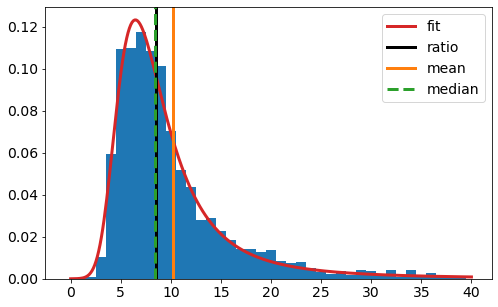

In [249]:
from scipy.optimize import curve_fit
    
_r = np.linspace(0,40,301)
fitfunc = lambda x, *args: ratio_pdf(x, *args)

μo = np.nanmean(o.flatten())
μc = np.nanmean(c.flatten())
σo = np.nanstd(o.flatten())
σc = np.nanstd(c.flatten())

μr = μo/μc
σr = np.abs(μr) * np.sqrt((σo/μo)**2 + (σc/μc)**2)

r = o/c

r = r[r > 0]
r = r[r < (μr + 7*σr)]

fig, ax = plt.subplots(figsize = (8,5))
nr, br, _ = ax.hist(r, bins = np.arange(-0.5,40.5,1), density = True)

p0 = np.array([μo, μc, σo, σc])
bounds = ((μo-σo, μc-σc, 0.25*σo, 0.25*σc), (μo+σo, μc+σc, 1.75*σo, 1.75*σc))

popt, pcov = curve_fit(fitfunc, br[:-1]+np.diff(br)[0]/2, nr, p0 = p0, bounds = bounds)

ax.plot(_r, fitfunc(_r, *popt), 'C3', label = 'fit', lw = 3)

ax.axvline(ratio, color = 'k', lw = 3, label = 'ratio')
ax.axvline(np.mean(r), color = 'C1', label = 'mean', lw = 3)
ax.axvline(np.median(r), ls = '--', color = 'C2', label = 'median', lw = 3)
ax.legend(fontsize = 14)
set_fontsize(ax, 14)

In [251]:
o.mean()/c.mean()

8.560113460936554

In [252]:
ocut.mean()/ccut.mean()

8.524528510194575

In [253]:
p0[0]/p0[1]

8.560113460936554

In [254]:
popt[0]/popt[1]

8.297766555585005

In [167]:
o = o.reshape(-1,nbunched)
c = c.reshape(-1,nbunched)

mo = o.mean(axis = 1)
mc = c.mean(axis = 1)
stdo = o.std(axis = 1)/np.sqrt(nbunched)
stdc = c.std(axis = 1)/np.sqrt(nbunched)

r = mo/mc
e = np.abs(r)*np.sqrt((stdo/mo)**2+(stdc/mc)**2)

rc on mean : 280574.165, fit : 284404.034
rc off mean : 32142.968, fit : 35667.463
rc on mean : 217854.848, fit : 229062.922
rc off mean : 27957.414, fit : 26935.382


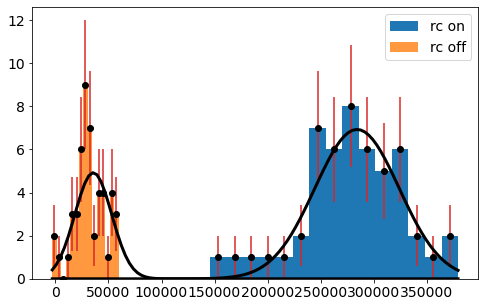

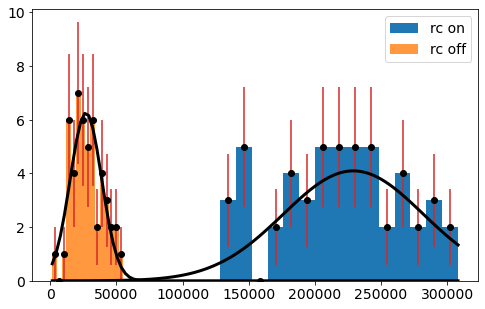

In [168]:
for ci, oi in zip(c,o[:2]):
    _x = np.linspace(min(ci.min(), oi.min()), max(oi.max(), ci.max()), 101)
    fig, ax = plt.subplots(figsize = (8,5))
    histo = ax.hist(oi, label = 'rc on', bins = 15)
    histc = ax.hist(ci, label = 'rc off', alpha = 0.8, bins = 15)
    ax.legend(fontsize = 14)
    set_fontsize(ax, 14)
    y = histo[0]
    x = histo[1][:-1]+np.diff(histo[1])[0]/2
    p0 = (np.mean(oi), np.std(oi), np.max(y))
    sigma = np.sqrt(y)
    sigma[sigma == 0] = 1
    popt, pcov = curve_fit(fit_func,x,y,sigma = sigma, p0 = p0, absolute_sigma = True)
    ax.plot(_x, fit_func(_x, *popt), color = 'k', lw = 3)
    ax.errorbar(x, y, yerr = np.sqrt(y), fmt = '.', ecolor = 'C3', color = 'k', ms = 12)
    
    print(f'rc on mean : {oi.mean():.3f}, fit : {popt[0]:.3f}')
    
    y = histc[0]
    x = histc[1][:-1]+np.diff(histc[1])[0]/2
    p0 = (np.mean(ci), np.std(ci), np.max(y))
    sigma[sigma == 0] = 1
    popt, pcov = curve_fit(fit_func,x,y,sigma = sigma, p0 = p0, absolute_sigma = True)
    ax.plot(_x, fit_func(_x, *popt), color = 'k', lw = 3)
    ax.errorbar(x, y, yerr = np.sqrt(y), fmt = '.', ecolor = 'C3', color = 'k', ms = 12)
    
    print(f'rc off mean : {ci.mean():.3f}, fit : {popt[0]:.3f}')

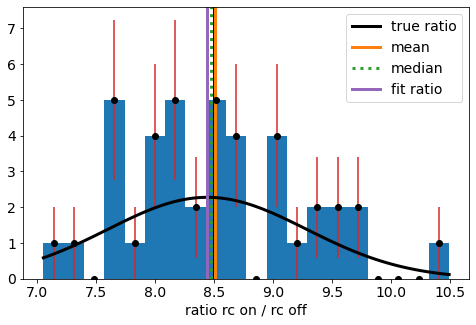

In [169]:
fig, ax = plt.subplots(figsize = (8,5))
y, bins, _ = ax.hist(r, np.linspace(max(r.min(), 0),min(r.max(), ratio*2),21))
ax.axvline(ratio, lw = 3, color = 'k', label = 'true ratio')
ax.axvline(r.mean(), lw = 3, color = 'C1', label = 'mean')
ax.axvline(np.median(r), lw = 3, color = 'C2', ls = 'dotted', label = 'median')

_x = np.linspace(bins.min(), bins.max(), 101)
x = bins[:-1]+np.diff(bins)[0]/2
p0 = (np.mean(r), np.std(r), np.max(y))
sigma = np.sqrt(y)
sigma[sigma == 0] = 1
popt, pcov = curve_fit(fit_func,x,y,sigma = sigma, p0 = p0, absolute_sigma = True)
ax.plot(_x, fit_func(_x, *popt), color = 'k', lw = 3)
ax.errorbar(x, y, yerr = np.sqrt(y), fmt = '.', ecolor = 'C3', color = 'k', ms = 12)

ax.axvline(popt[0], lw = 3, color = 'C4', label = 'fit ratio')

ax.legend(fontsize = 14)
ax.set_xlabel('ratio rc on / rc off')

set_fontsize(ax, 14)

In [170]:
print(f'mean : {r.mean():.3f}; median : {np.median(r):.3f}; std : {r.std():.3f}; std of mean : {r.std()/np.sqrt(len(r)):.3f}')
print(f'fit mean : {popt[0]:.3f}; fit std : {popt[1]:.3f}; fit std of mean : {popt[1]/np.sqrt(len(r)):.3f}')

mean : 8.508; median : 8.475; std : 0.736; std of mean : 0.116
fit mean : 8.440; fit std : 0.843; fit std of mean : 0.133


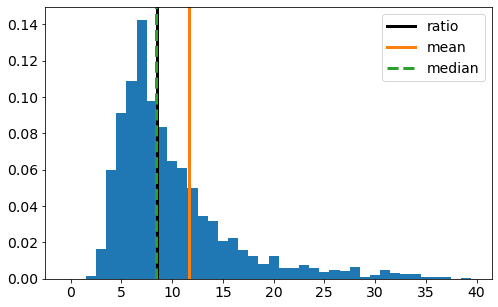

In [172]:
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(o.reshape(-1)/c.reshape(-1), bins = np.arange(-0.5,40.5,1), density = True)

ax.axvline(ratio, color = 'k', lw = 3, label = 'ratio')
ax.axvline(np.mean(o.flatten()/c.flatten()), color = 'C1', label = 'mean', lw = 3)
ax.axvline(np.median(o.flatten()/c.flatten()), ls = '--', color = 'C2', label = 'median', lw = 3)
ax.legend(fontsize = 14)
set_fontsize(ax, 14)

In [175]:
print(f'median : {np.median(o.flatten()/c.flatten()):.3f}')
print(f'ratio of means : {o.flatten().mean()/c.flatten().mean():.3f}')

median : 8.411
ratio of means : 8.453


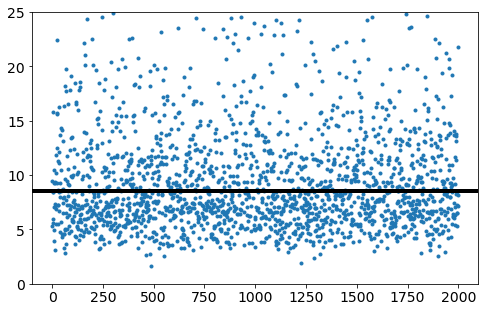

In [176]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(o.flatten()/c.flatten(), '.')
ax.set_ylim(0,25)
ax.axhline(ratio, color = 'k', lw = 4)
set_fontsize(ax, 14)

In [178]:
from tqdm import tqdm

ratio = 8.5

stdn = 2000
mc = 30000
mo = ratio * mc
stdo = 33000-stdn
stdc = 12000-stdn

sc = 30000
nsamples = int(4000)
nbunched = 50

means = []
medians = []
mean_ratio = []
for _ in tqdm(range(int(1e4))):

    o = []
    c = []
    for _ in range(nsamples//nbunched //2):
        amp = np.random.normal(1,0.4)
        if amp < 0:
            amp = 0
        ci = amp*np.random.normal(mc, stdc, nbunched)
        ci[ci < 0] = 0
        oi = amp*np.random.normal(mo, stdo, nbunched)
        oi[oi < 0] = 0
        o.extend(oi + np.random.normal(0, stdn, nbunched))
        c.extend(ci + np.random.normal(0, stdn, nbunched))
    o = np.asarray(o)
    c = np.asarray(c)
    medians.append(np.median(o/c))
    means.append(np.mean(o/c))
    mean_ratio.append(o.mean()/c.mean())

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:15<00:00, 636.79it/s]


8.452 +/- 0.103


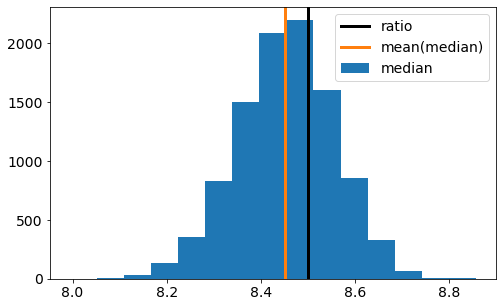

In [179]:
fig, ax = plt.subplots(figsize = (8,5))
n, b, _ = ax.hist(medians, label = 'median', bins = 15)
ax.axvline(ratio, color = 'k', lw = 3, label = 'ratio')
ax.axvline(np.mean(medians), color = 'C1', lw = 3, label = 'mean(median)')

ax.legend(fontsize = 14)

set_fontsize(ax, 14)

print(f'{np.mean(medians):.3f} +/- {np.std(medians):.3f}')

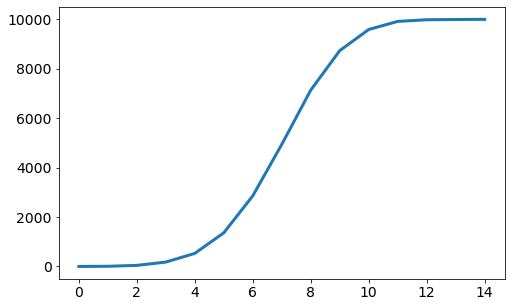

In [180]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(np.cumsum(n), lw = 3)

set_fontsize(ax, 14)

8.499 +/- 0.073


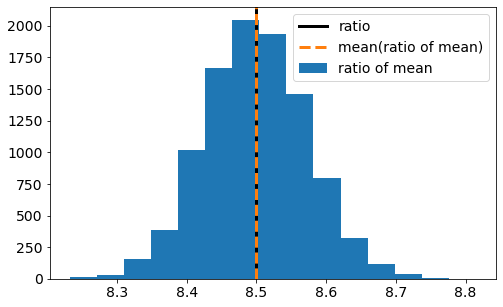

In [181]:
fig, ax = plt.subplots(figsize = (8,5))
n, b, _ = ax.hist(mean_ratio, label = 'ratio of mean', bins = 15)
ax.axvline(ratio, color = 'k', lw = 3, label = 'ratio')
ax.axvline(np.mean(mean_ratio), color = 'C1', lw = 3, ls = '--', label = 'mean(ratio of mean)')

ax.legend(fontsize = 14)

set_fontsize(ax, 14)

print(f'{np.mean(mean_ratio):.3f} +/- {np.std(mean_ratio):.3f}')

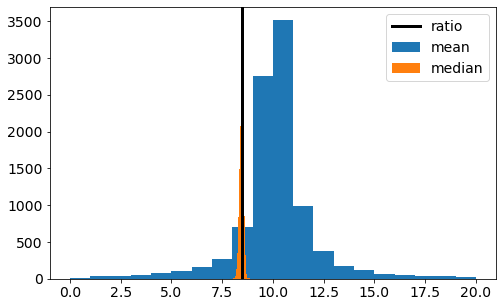

In [182]:
fig, ax = plt.subplots(figsize = (8,5))
ax.axvline(ratio, color = 'k', lw = 3, label = 'ratio')
ax.hist(means, label = 'mean', bins = np.linspace(0,20,21))
ax.hist(medians, label = 'median', bins = 15)

ax.legend(fontsize = 14)

set_fontsize(ax, 14)

### Check fit ratio distribution 

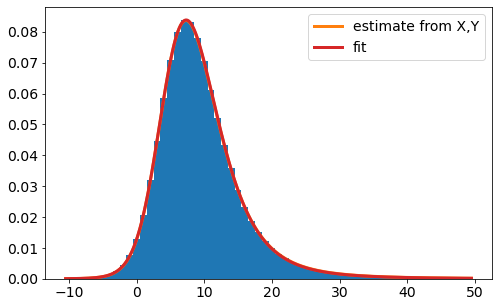

In [296]:
ratio = 8.5
samples = 1000*int(4000)

μo = ratio
μc = 1
σo = 0.5*ratio
σc = 0.3

o = np.random.normal(μo, σo, samples//2)
c = np.random.normal(μc, σc, samples//2)

fitfunc = lambda x, *args: ratio_pdf(x, *args)


mo = o.mean()
mc = c.mean()
so = o.std()
sc = c.std()

μr = mo/mc
σr = np.abs(μr) * np.sqrt((so/mo)**2 + (sc/mc)**2)

r = o/c

r = r[r > (μr - 7*σr)]
r = r[r < (μr + 7*σr)]

nr, br = np.histogram(r, bins = np.arange(-10.5,50.5,1), density = True)

_r = np.linspace(br.min(),br.max(),301)

p0 = np.array([o.mean(), c.mean(), o.std(), c.std()])
bounds = ((mo-so, mc-sc, 0.25*so, 0.25*sc), (mo+so, mc+sc, 1.75*so, 1.75*sc))

popt, pcov = curve_fit(fitfunc, br[:-1]+np.diff(br)[0]/2, nr, p0 = p0, bounds = bounds)
    
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(r, bins = np.arange(-10.5,40.5,1), density = True)
ax.plot(_r, fitfunc(_r, *p0), label = 'estimate from X,Y', lw = 3)
ax.plot(_r, fitfunc(_r, *popt), color = 'C3', label = 'fit', lw = 3)

ax.legend(fontsize = 14)
set_fontsize(ax, 14)

In [306]:
ratio = 8.5
samples = int(4000)

μo = ratio
μc = 1
σo = 0.5*ratio
σc = 0.3

fit_ratio = []
mean_ratio = []
median_ratio = []

for _ in tqdm(range(300)):
    o = np.random.normal(μo, σo, samples//2)
    c = np.random.normal(μc, σc, samples//2)

    fitfunc = lambda x, *args: ratio_pdf(x, *args)
    
    
    mo = o.mean()
    mc = c.mean()
    so = o.std()
    sc = c.std()
    
    μr = mo/mc
    σr = np.abs(μr) * np.sqrt((so/mo)**2 + (sc/mc)**2)

    r = o/c

    r = r[r > (μr - 7*σr)]
    r = r[r < (μr + 9*σr)]

    nr, br = np.histogram(r, bins = np.arange(-25.5,50.5,1), density = True)

    p0 = np.array([o.mean(), c.mean(), o.std(), c.std()])
    bounds = ((mo-so, mc-sc, 0.25*so, 0.25*sc), (mo+so, mc+sc, 1.75*so, 1.75*sc))

    popt, pcov = curve_fit(fitfunc, br[:-1]+np.diff(br)[0]/2, nr, p0 = p0, bounds = bounds)
    
    fit_ratio.append(popt[0]/popt[1])
    mean_ratio.append(μr)
    median_ratio.append(np.median(r))

 55%|████████████████████████████████████████████▎                                   | 166/300 [03:31<02:51,  1.28s/it]


KeyboardInterrupt: 

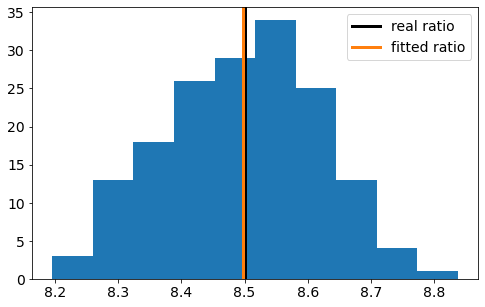

In [307]:
fig, ax = plt.subplots(figsize = (8,5))

ax.hist(fit_ratio)
ax.axvline(ratio, color = 'k', lw = 3, label = 'real ratio')
ax.axvline(np.mean(fit_ratio), color = 'C1', lw = 3, label = 'fitted ratio')

ax.legend(fontsize = 14)
set_fontsize(ax, 14)

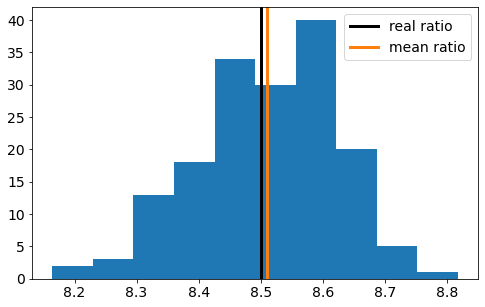

In [308]:
fig, ax = plt.subplots(figsize = (8,5))

ax.hist(mean_ratio)
ax.axvline(ratio, color = 'k', lw = 3, label = 'real ratio')
ax.axvline(np.mean(mean_ratio), color = 'C1', lw = 3, label = 'mean ratio')

ax.legend(fontsize = 14)
set_fontsize(ax, 14)

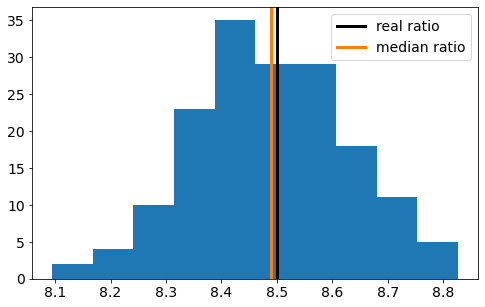

In [309]:
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(median_ratio)
ax.axvline(ratio, color = 'k', lw = 3, label = 'real ratio')
ax.axvline(np.mean(median_ratio), color = 'C1', lw = 3, label = 'median ratio')

ax.legend(fontsize = 14)
set_fontsize(ax, 14)